# Análise Das Bases de Dados

## Importando bases de dados

In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [2]:
data_google = pd.read_csv('./data/SP_Data_Google.csv')
data_google['date'] = pd.to_datetime(data_google['date'], infer_datetime_format=True)

data_apple = pd.read_csv('./data/SP_Data_Apple.csv')
data_apple['date'] = pd.to_datetime(data_apple['date'], infer_datetime_format=True)

data_cetesb = {}
for file_name in os.listdir('./data/cetesb/'):
    estacao = '-'.join(file_name.split('-')[:-1])
    data_cetesb[estacao] = pd.read_csv('./data/cetesb/'+file_name)
    data_cetesb[estacao]['Data'] = pd.to_datetime(data_cetesb[estacao]['Data'], infer_datetime_format=True)
    # As entradas de 00:00 do mes 10 tao como mes 11, tem que arrumar
    date_data = data_cetesb[estacao]['Data'].copy()
    for index, value in data_cetesb[estacao]['Data'].iteritems():
        if (value.month == 11) and (value.hour == 0) and (date_data[index+1].month == 10):
            date_data[index] -= pd.DateOffset(months=1)
    data_cetesb[estacao]['Data'] = date_data

C:\Users\User\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
def mediaSemanal(original):
    week_mean = pd.DataFrame()
    for column in original.columns:
        week_mean[column] = original[column].resample("W").mean()
    return week_mean
        

## Dados da Apple

O *Apple mobility Trends* mede o volume relativo de solicitações de direção em relação a um volume de referência em 13 de janeiro de 2020.

In [ ]:
data_apple_sp = data_apple[data_apple['region'] == 'Sao Paulo']
data_apple_sp = data_apple[['date', 'value', 'transportation_type']].sort_values('date', ascending=True)
data_apple_driving = data_apple_sp[data_apple_sp['transportation_type'] == 'driving'][['date', 'value']].reset_index(drop=True)
data_apple_transit = data_apple_sp[data_apple_sp['transportation_type'] == 'transit'][['date', 'value']].reset_index(drop=True)
data_apple_walking = data_apple_sp[data_apple_sp['transportation_type'] == 'walking'][['date', 'value']].reset_index(drop=True)

In [ ]:
data_apple_driving.set_index("date", inplace=True)
data_apple_transit.set_index("date", inplace=True)
data_apple_walking.set_index("date", inplace=True)
data_apple_driving.head()

In [ ]:
data_apple_driving_mean = mediaSemanal(data_apple_driving)
data_apple_transit_mean = mediaSemanal(data_apple_transit)
data_apple_walking_mean = mediaSemanal(data_apple_walking)

In [ ]:
#print(data_apple_sp)

plt.figure(figsize=(20,5))
plt.plot(data_apple_driving.index, data_apple_driving['value'], label='driving')
plt.plot(data_apple_transit.index, data_apple_transit['value'], label='transit')
plt.plot(data_apple_walking.index, data_apple_walking['value'], label='walking')
plt.legend()
plt.title("Apple Mobility Trends Report - Porcentagem de requests no Apple Maps em comparação a 13/01/2020 - São Paulo/SP")
plt.grid()
plt.show()

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data_apple_driving_mean.index, data_apple_driving_mean['value'], label='driving')
plt.plot(data_apple_transit_mean.index, data_apple_transit_mean['value'], label='transit')
plt.plot(data_apple_walking_mean.index, data_apple_walking_mean['value'], label='walking')
plt.legend()
plt.title("Apple Mobility Trends Report - Média semanal de requests no Apple Maps - São Paulo/SP")
plt.grid()
plt.show()

## Dados do Google

O *Google Mobility Report* mede as tendências como uma variação percentualdo número de visitantes em cada lugar em relação aos dias de referência. Segundo a documentação do Google: "Um dia de referência representa um valor normal para esse mesmo dia da semana. O dia de referência é o valor mediano do período de cinco semanas (3 de janeiro a 6 de fevereiro de 2020)"

In [ ]:
data_google_sp = data_google[data_google['sub_region_2'] == "São Paulo"]
data_google_sp = data_google_sp[data_google_sp.columns[-7:]].sort_values('date', ascending=True).reset_index(drop=True)

In [ ]:
data_google_sp.set_index("date", inplace=True)

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data_google_sp.index, data_google_sp['retail_and_recreation_percent_change_from_baseline'], label='retail and recreation')
plt.plot(data_google_sp.index, data_google_sp['grocery_and_pharmacy_percent_change_from_baseline'], label='grocery and pharmacy')
plt.plot(data_google_sp.index, data_google_sp['parks_percent_change_from_baseline'], label='parks')
plt.plot(data_google_sp.index, data_google_sp['transit_stations_percent_change_from_baseline'], label='transit stations')
plt.plot(data_google_sp.index, data_google_sp['workplaces_percent_change_from_baseline'], label='workplaces')
plt.legend()
plt.title("Google Mobility Report - Percent change from baseline - São Paulo/SP")
plt.grid()
plt.show()

In [ ]:
data_google_sp_mean = mediaSemanal(data_google_sp)

In [ ]:
plt.figure(figsize=(20,6))
plt.plot(data_google_sp_mean.index, data_google_sp_mean['retail_and_recreation_percent_change_from_baseline'], label='retail and recreation')
plt.plot(data_google_sp_mean.index, data_google_sp_mean['grocery_and_pharmacy_percent_change_from_baseline'], label='grocery and pharmacy')
plt.plot(data_google_sp_mean.index, data_google_sp_mean['parks_percent_change_from_baseline'], label='parks')
plt.plot(data_google_sp_mean.index, data_google_sp_mean['transit_stations_percent_change_from_baseline'], label='transit stations')
plt.plot(data_google_sp_mean.index, data_google_sp_mean['workplaces_percent_change_from_baseline'], label='workplaces')
plt.legend()
plt.title("Google Mobility Report - Média semanal - São Paulo/SP")
plt.grid()
plt.show()

> Diferente das outras categorias, a categoria **Residential** mostra a variação do tempo que as pessoas ficam em casa, e por isso apresenta uma variação menor que as outras categorias.

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(data_google_sp.index, data_google_sp['residential_percent_change_from_baseline'], label='residential')
plt.legend()
plt.title("Google Mobility Report - Percent change from baseline - São Paulo/SP")
plt.grid()
plt.show()

## Dados do Cetesb

In [4]:
def normalize_df(df):
    out = df.copy()
    for column in df:
        if column == 'Data':
            continue
        min_ = min(df[column])
        max_ = max(df[column])
        out[column] = (df[column] - min_) / (max_ - min_)
    return out

In [5]:
data_vars = ['co', 'mp10', 'no', 'no2', 'nox', 'o3', 'temperature', 'humidity', 'wind_velocity']
n_var_columns = len(data_cetesb[estacao].columns)-1  # -1 pq nao conta 'Data'

plotted = {}
for idx_estacao, estacao in enumerate(data_cetesb):
    data_2019 = data_cetesb[estacao].loc[data_cetesb[estacao].Data.dt.year == 2019]
    data_2020 = data_cetesb[estacao].loc[data_cetesb[estacao].Data.dt.year == 2020]

    mean_by_day_19 = data_2019.groupby(data_2019.Data.dt.date).mean().reset_index()
    mean_by_day_20 = data_2020.groupby(data_2020.Data.dt.date).mean().reset_index()
    mean_by_day_20['Data'] = mean_by_day_20['Data'] - pd.DateOffset(years=1)
    
    plotted[estacao], ploaxes = plt.subplots(len(data_cetesb[estacao].columns)-1, figsize=(20,5*(len(data_cetesb[estacao].columns)-1)),squeeze=False)
    plotted[estacao].suptitle('Comparação 2019-2020 para '+estacao)
    i,j = 0,0
    for idx_var, column in enumerate(data_vars):
        if column not in data_cetesb[estacao].columns:
            continue
            
        ploaxes[i,j].plot(mean_by_day_19['Data'], mean_by_day_19[column], label="2019")
        ploaxes[i,j].plot(mean_by_day_20['Data'], mean_by_day_20[column], label="2020")
        ploaxes[i,j].grid(True)
        ploaxes[i,j].set_title(column+' - Média diária')
        ploaxes[i,j].legend()
        i += 1

    plt.close(plotted[estacao])

### Parâmetros disponíveis para cada estação

In [6]:
availableCols = pd.DataFrame(index=data_cetesb.keys(),columns=data_vars)
for key in data_cetesb:
    for column in availableCols.columns:
        if column in data_cetesb[key].columns:
            availableCols.loc[key, column] = 'Disponível'
        else:
            availableCols.loc[key, column] = 'Sem dados'
availableCols.style.applymap(lambda x: "background-color: %s" % ('green' if x=='Disponível' else 'red'))

### Boxplots

#### dados somados

In [7]:
dados_totais = pd.DataFrame()
for estacao in data_cetesb:
    estData = data_cetesb[estacao].copy()
    estData["Estação"] = estacao
    dados_totais = dados_totais.append(estData)

In [8]:
dados_totais = dados_totais.set_index('Data')

In [9]:
dados_totais["DiaDaSemana"] = dados_totais.index.dayofweek

In [10]:
dados_totais['Mes'] = dados_totais.index.month

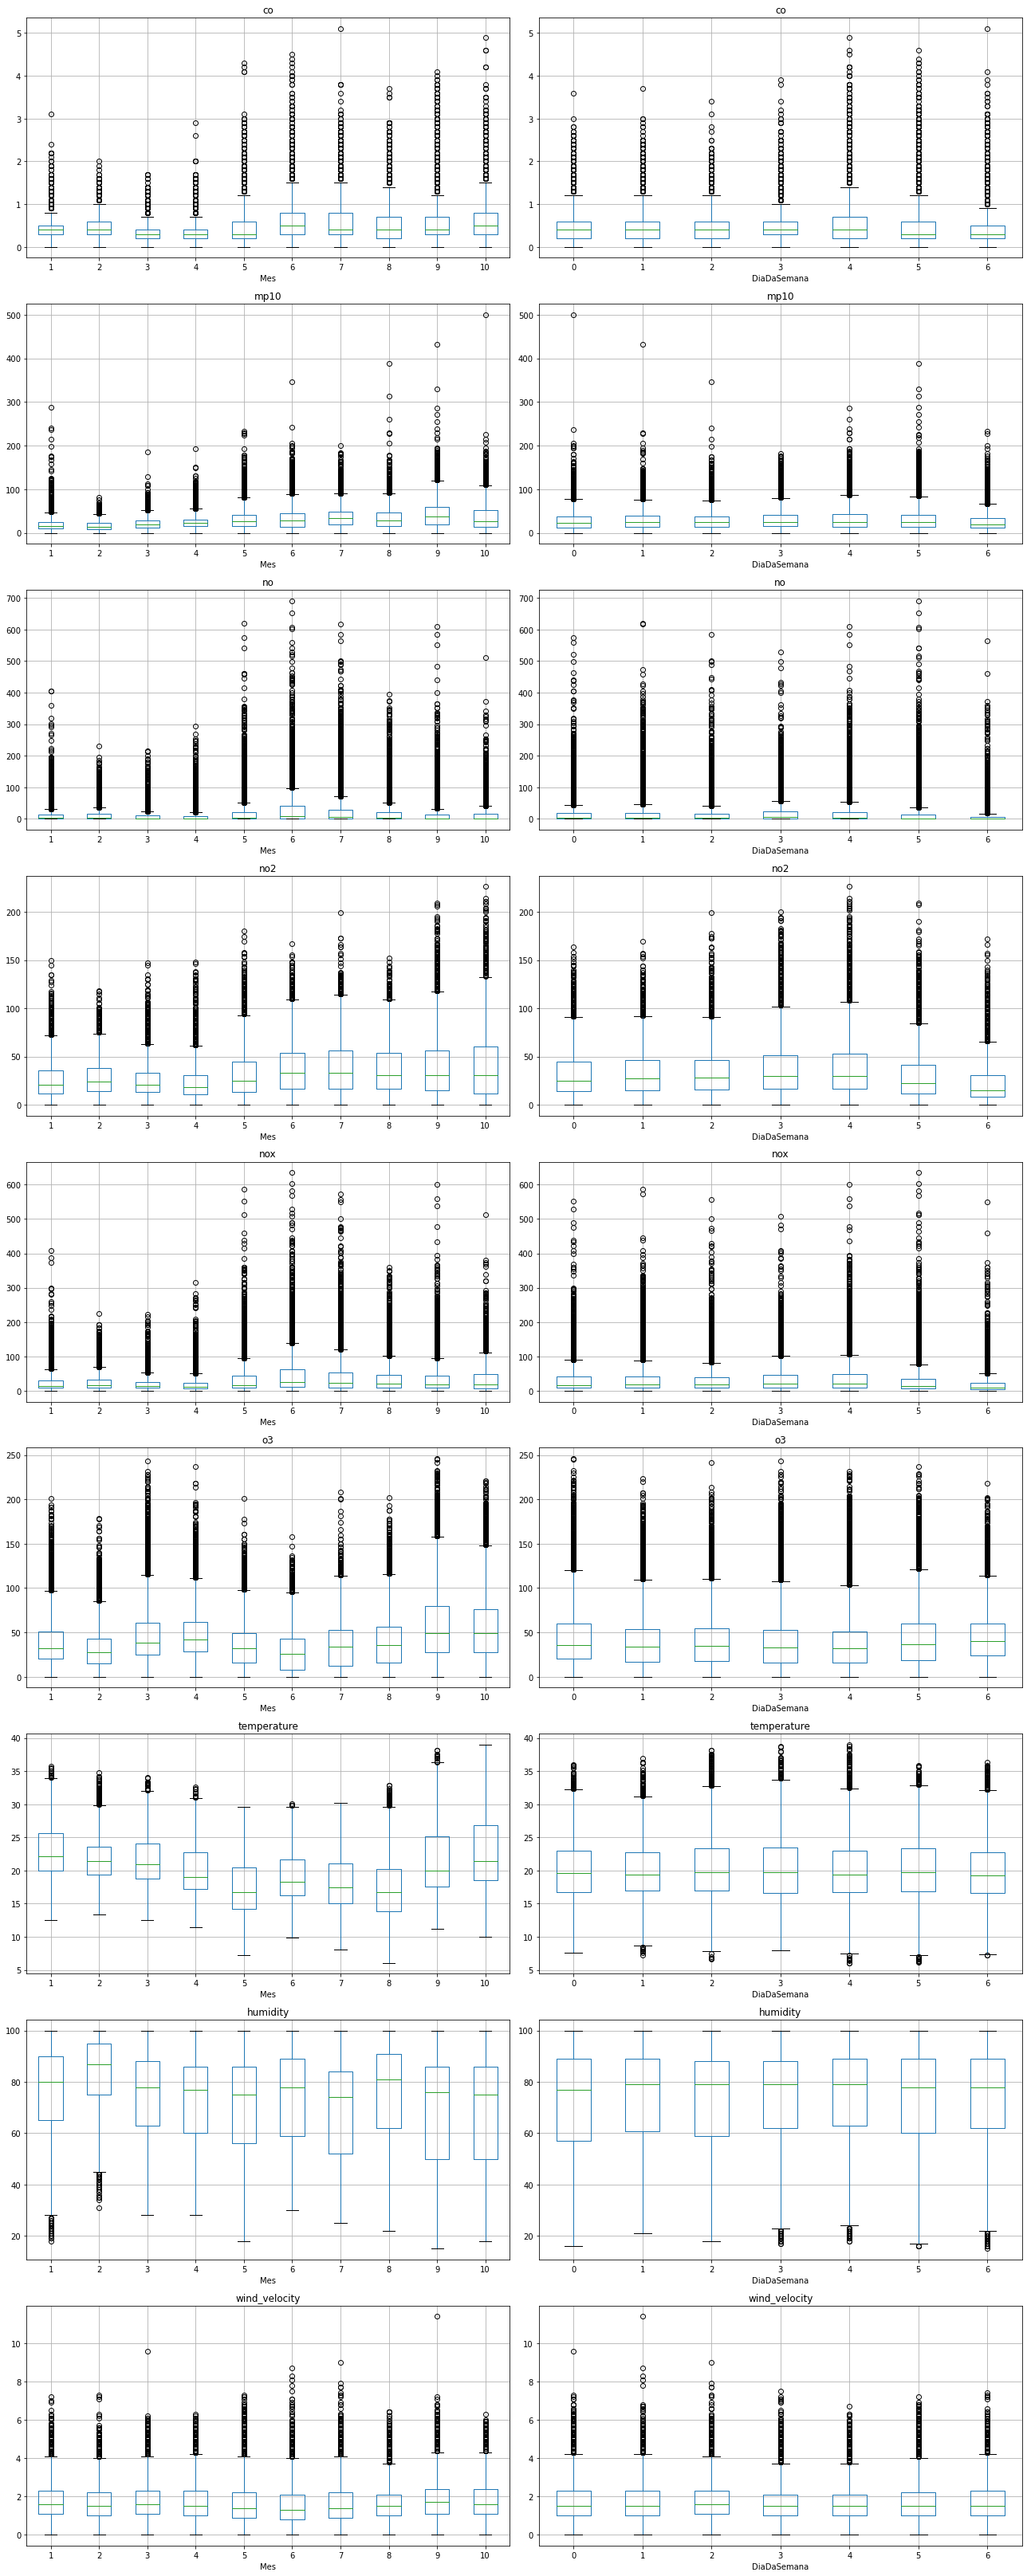

In [11]:
fig, axs = plt.subplots(len(data_vars),2, figsize=(18,5*len(data_vars)), tight_layout=True)
for idx_var,var in enumerate(data_vars):
    dados_totais[dados_totais.index.year == 2020].dropna(subset=[var], how='any').boxplot(var, by="Mes", ax=axs[idx_var,0])
    dados_totais[dados_totais.index.year == 2020].dropna(subset=[var], how='any').boxplot(var, by="DiaDaSemana", ax=axs[idx_var,1])
fig.suptitle("")
plt.show()

#### média

In [12]:
media_dados = dados_totais.copy()

In [13]:
media_dados = media_dados.groupby(media_dados.index).mean()

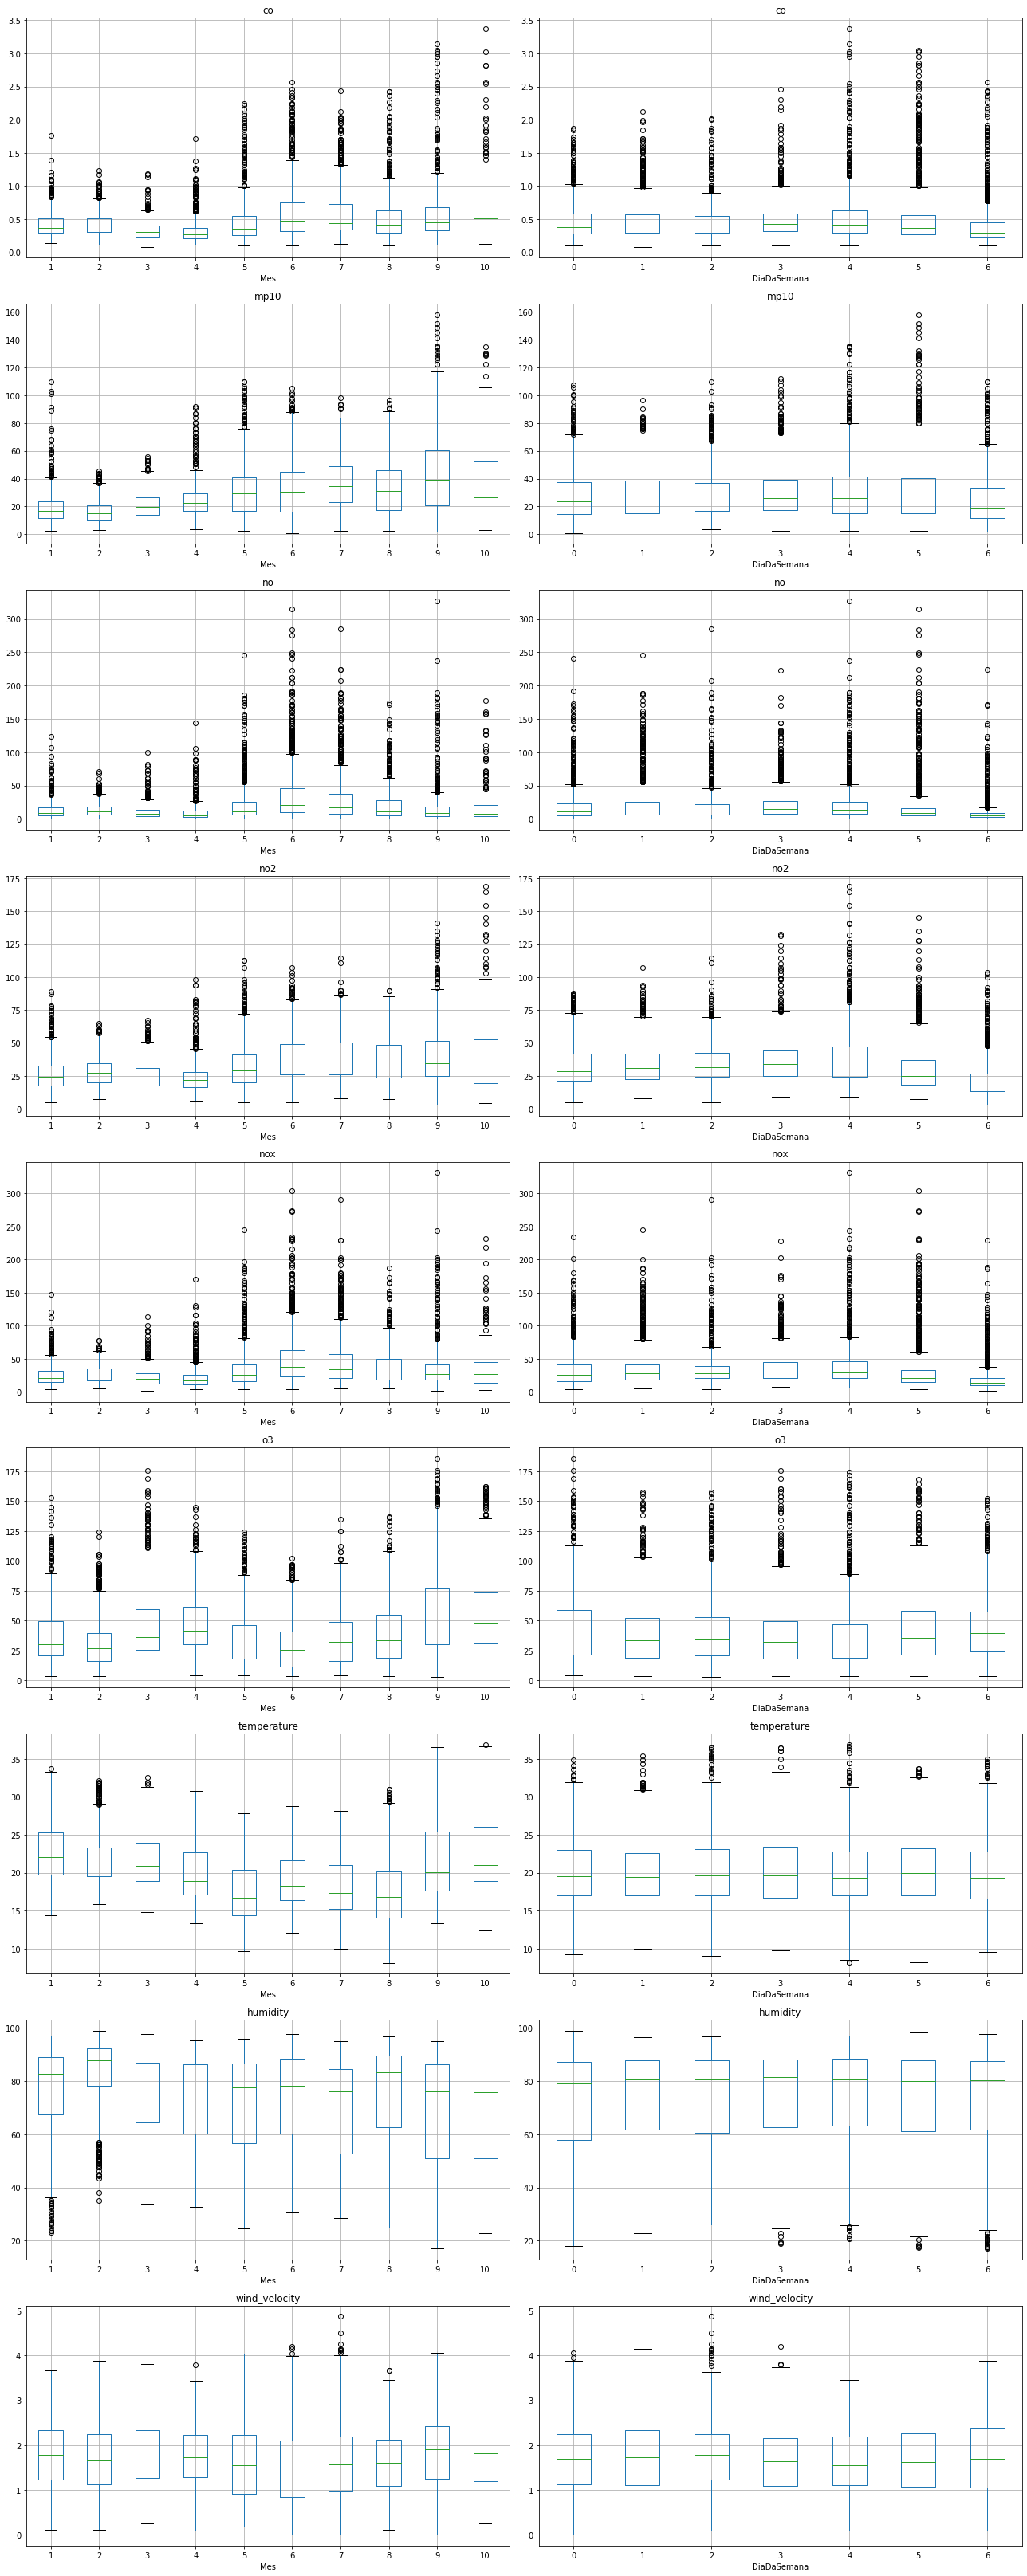

In [14]:
fig, axs = plt.subplots(len(data_vars),2, figsize=(18,5*len(data_vars)), tight_layout=True)
for idx_var,var in enumerate(data_vars):
    media_dados[media_dados.index.year == 2020].boxplot(var, by="Mes", ax=axs[idx_var,0])
    media_dados[media_dados.index.year == 2020].boxplot(var, by="DiaDaSemana", ax=axs[idx_var,1])
fig.suptitle("")
plt.show()

### Capão Redondo

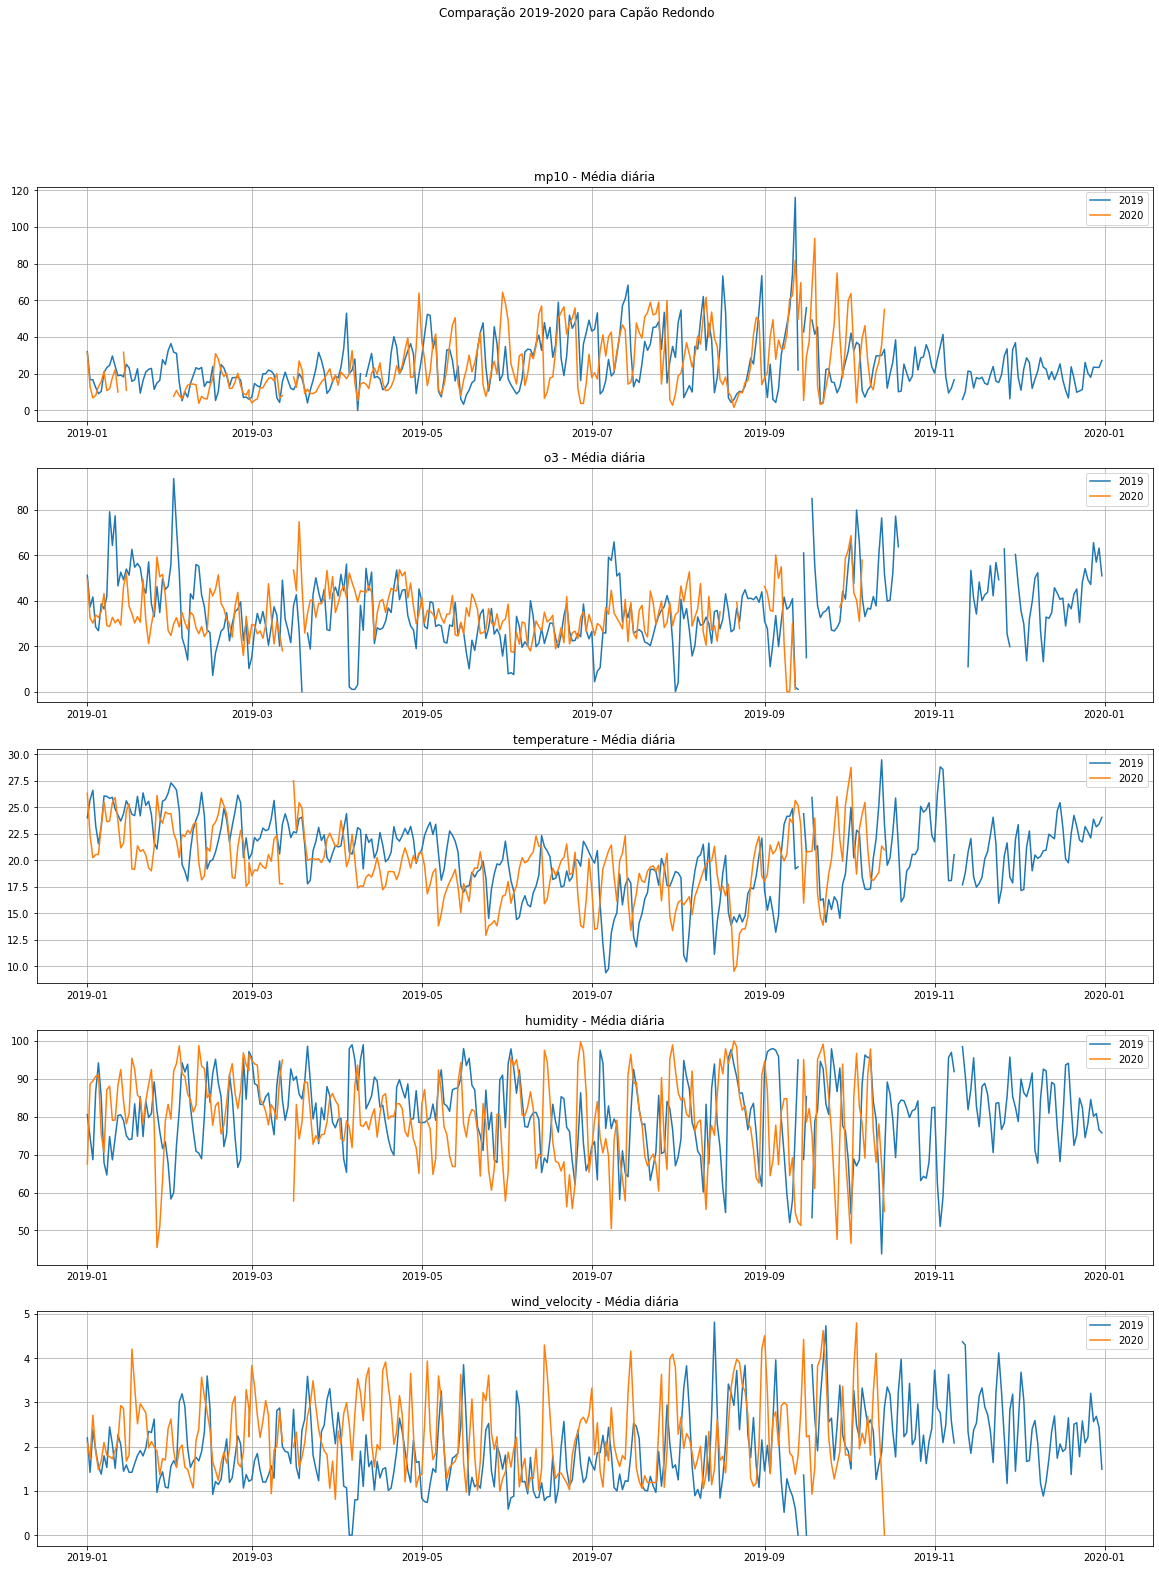

In [15]:
capao2020 = data_cetesb['Capão Redondo'].loc[data_cetesb['Capão Redondo'].Data.dt.year == 2020]
plotted['Capão Redondo']

#### Média diária

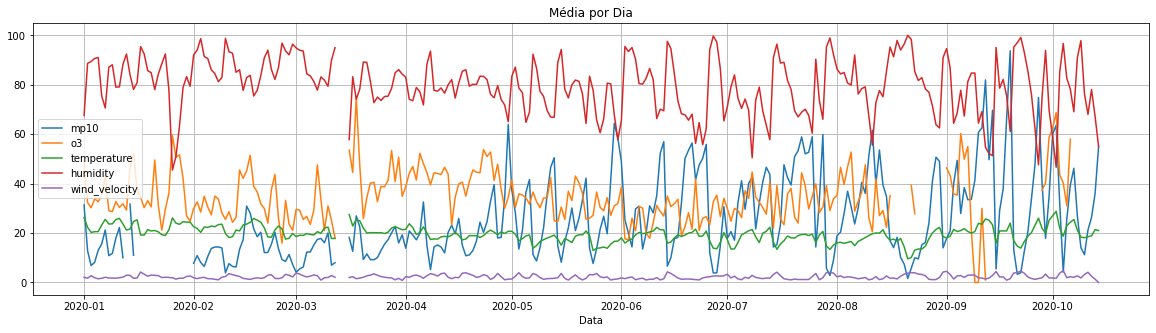

In [16]:
mean_by_day = capao2020.groupby(capao2020.Data.dt.date).mean()
mean_by_day.plot(figsize=(20,5), grid=True, title="Média por Dia")
plt.show()

#### Média para cada hora do dia

In [ ]:
mean_by_hour = capao2020.groupby(capao2020.Data.dt.hour).mean()
mean_by_hour.plot(figsize=(20,5), grid=True, title="Média por hora").set_xticks(mean_by_hour.index)
plt.xlabel("Hora")
plt.show()

### Cerqueira César

In [ ]:
data_cetesb['Cerqueira César'].columns

In [ ]:
plotted['Cerqueira César']

### Cidade Universitária-USP-Ipen

In [ ]:
plotted['Cid.Universitária-USP-Ipen']

### Congonhas

In [ ]:
plotted['Congonhas']

### Grajaú-Parelheiros

In [ ]:
plotted["Grajaú-Parelheiros"]

### Ibirapuera

In [ ]:
plotted['Ibirapuera']

### Interlagos

In [ ]:
plotted["Interlagos"]

### Itaim Paulista

In [ ]:
plotted['Itaim Paulista']

### Itaquera

In [ ]:
plotted['Itaquera']

### Marginal Tietê-Pte Remédios

In [ ]:
plotted['Marg.Tietê-Pte Remédios']

### Mooca

### Nossa Senhora do Ó

### Parque Dom Pedro II

In [ ]:
plotted['Parque D.Pedro II']

### Perus

In [ ]:
plotted['Perus']

### Pico do Jaraguá

In [ ]:
plotted['Pico do Jaraguá']

### Pinheiros

In [ ]:
plotted['Pinheiros']

### Santana

In [ ]:
plotted['Santana']

### Santo Amaro

In [ ]:
plotted['Santo Amaro']